## Version 1 / Feature making

In [168]:
import pandas as pd
import numpy as np

In [281]:
train = pd.read_csv('train.csv').iloc[:,1:-1]
train_ = pd.read_csv('train.csv')
test = pd.read_csv('test.csv').iloc[:,1:]

target = pd.read_csv('train.csv').nerdiness

mode로 채울 것 : Q시리즈, TIPI시리즈, engnat, orientation, familisize  
무응답으로 채울 것 : education, hand, married, religion, voted

In [284]:
# 존재하지 않는 값으로 결측치 채우기 
train['hand'] = train.hand.fillna(4)
test['hand'] = test.hand.fillna(4)
train_['hand'] = train_.hand.fillna(4)

train['religion'] = train.religion.fillna(13)
test['religion'] = test.religion.fillna(13)
train_['religion'] = train_.religion.fillna(13)

train['married'] = train.married.fillna(4)
test['married'] = test.married.fillna(4)
train_['married'] = train_.married.fillna(4)

train['education'] = train.education.fillna(5)
test['education'] = test.education.fillna(5)
train_['education'] = train_.education.fillna(5)

train['voted'] = train.voted.fillna(3)
test['voted'] = test.voted.fillna(3)
train_['voted'] = train_.voted.fillna(3)

In [285]:
for i in train.columns:
    train.loc[train[i].isna(), i] = train[i].mode()[0]
    
for i in test.columns:
    test.loc[test[i].isna(), i] = test[i].mode()[0]
    
for i in train_.columns:
    train_.loc[train_[i].isna(), i] = train_[i].mode()[0]

In [286]:
# 결측치 확인
train.isna().sum().sum()

0

In [287]:
test.isna().sum().sum()

0

In [288]:
final_train = train.copy()
final_test = test.copy()

In [289]:
train.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'country', 'introelapse',
       'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2',
       'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'hand', 'religion', 'orientation',
       'voted', 'married', 'familysize', 'ASD'],
      dtype='object')

**column을 확인해보고 해당 column에 맞는 encoding을 진행하였습니다.**

- Q열 : target encoding

In [ ]:
Q_columns = list(train.loc[:, train.columns[:26]].columns)
train_Q = train.loc[:,Q_columns]
train_Q['nerdiness'] = target

for c in Q_columns:
    mean_df = train_Q.groupby(c)['nerdiness'].agg('mean')
    final_train[c] = train[c].map(mean_df)
    final_test[c] = test[c].map(mean_df)

- country : Hashing Encoding

In [ ]:
from category_encoders.hashing import HashingEncoder

he = HashingEncoder(cols=['country']).fit(final_train,target)
final_train = he.transform(final_train)
final_test = he.transform(final_test)

- 시간관련 : 값 간의 편차가 크기 때문에 log변환

In [ ]:
train_time = train[['introelapse', 'testelapse', 'surveyelapse']]
test_time = test[['introelapse', 'testelapse', 'surveyelapse']]

final_train[['introelapse', 'testelapse', 'surveyelapse']] = np.log1p(train_time)
final_test[['introelapse', 'testelapse', 'surveyelapse']] = np.log1p(test_time)

- TP : target encoding

In [ ]:
tp_columns = [x for x in train.columns if x.startswith('TIPI')]

for column in tp_columns:
    mean_df = train_.groupby(column)['nerdiness'].agg('mean')
    final_train[column] = train[column].map(mean_df)
    final_test[column] = test[column].map(mean_df)

- VCL : one-hot-encoding

In [297]:
from sklearn.preprocessing import OneHotEncoder

vcl_columns = [x for x in train.columns if x.startswith('VCL')]
for column in vcl_columns:
    encoder = OneHotEncoder()
    encoded = encoder.fit_transform(train[[column]]).toarray()
    final_train[column+'_0'] = encoded[:,0]
    final_train[column+'_1'] = encoded[:,1]
    final_train = final_train.drop(columns = [column])

    encoded = encoder.transform(test[[column]]).toarray()
    final_test[column+'_0'] = encoded[:,0]
    final_test[column+'_1'] = encoded[:,1]
    final_test = final_test.drop(columns = [column])

- education : target encoding

In [ ]:
mean_df = train_.groupby('education')['nerdiness'].agg('mean')
final_train['education'] = train['education'].map(mean_df)
final_test['education'] = test['education'].map(mean_df)

- urban : target encoding

In [ ]:
column = 'urban'
mean_df = train_.groupby(column)['nerdiness'].agg('mean')
final_train[column] = train[column].map(mean_df)
final_test[column] = test[column].map(mean_df)

- gender : one-hot-encoding

In [301]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(train[['gender']]).toarray()
final_train['gender_0'] = encoded[:,0]
final_train['gender_1'] = encoded[:,1]
final_train = final_train.drop(columns = ['gender'])

encoded = encoder.transform(test[['gender']]).toarray()
final_test['gender_0'] = encoded[:,0]
final_test['gender_1'] = encoded[:,1]
final_test = final_test.drop(columns = ['gender'])

- engnat : target encoding

In [ ]:
mean_df = train_.groupby('engnat')['nerdiness'].agg('mean')
final_train['engnat'] = train['engnat'].map(mean_df)
final_test['engnat'] = test['engnat'].map(mean_df)

- hand : target encoding

In [ ]:
mean_df = train_.groupby('hand')['nerdiness'].agg('mean')
final_train['hand'] = train['hand'].map(mean_df)
final_test['hand'] = test['hand'].map(mean_df)

- orientation : target encoding

In [ ]:
mean_df = train_.groupby('orientation')['nerdiness'].agg('mean')
final_train['orientation'] = train['orientation'].map(mean_df)
final_test['orientation'] = test['orientation'].map(mean_df)

- married : target encoding

In [ ]:
mean_df = train_.groupby('married')['nerdiness'].agg('mean')
final_train['married'] = train['married'].map(mean_df)
final_test['married'] = test['married'].map(mean_df)

- familysize : 10인 이상은 10인 이상으로 취급 + target encoding

In [ ]:
train_.familysize = train_.familysize.apply(lambda x : 10 if x >= 10 else x) #10인 이상은 그냥 10인 이상 가구로 결정

mean_df = train_.groupby('familysize')['nerdiness'].agg('mean')
final_train['familysize'] = train_['familysize'].map(mean_df)

final_test.familysize = final_test.familysize.apply(lambda x : 10 if x >= 10 else x)
final_test['familysize'] = final_test['familysize'].map(mean_df)

- ASD : target encoding

In [ ]:
mean_df = train_.groupby('ASD')['nerdiness'].agg('mean')
final_train['ASD'] = train['ASD'].map(mean_df)
final_test['ASD'] = test['ASD'].map(mean_df)

In [314]:
final_train.isna().sum().sum()

0

In [315]:
final_test.isna().sum().sum()

0

In [363]:
# save feature
final_train.to_csv('final_train.csv',index=False)
final_test.to_csv('final_test.csv',index=False)

## Version 1 / Modeling

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier

import optuna
import sklearn.model_selection as model_selection

In [ ]:
# 저장한 피처 불러오기
train = pd.read_csv('final_train.csv')
test = pd.read_csv('final_test.csv')
target = pd.read_csv('train.csv').nerdiness

target데이터 값의 비율을 일치시키기 위한 Oversampling 사용 \( SMOTE \)

In [6]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2020, k_neighbors=5)
X_smote, y_smote = smote.fit_resample(train,target)

### ExtraTrees Optuna 튜닝

In [9]:
# smote기법을 사용할 경우 밑에 값이 0으로만 채워지기 때문에 전체 데이터 resampling
X_smote["y_train"]= y_smote
X_smote=X_smote.sample(frac=1, random_state=5252)
y_smote = X_smote["y_train"]
del X_smote["y_train"]

In [14]:
def objective(trial):
    et_n_estimators = trial.suggest_int("n_estimators", 30, 1500)
    et_min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    et_max_depth = trial.suggest_int("max_depth", 20, 1000)
    
    classifier_obj = ExtraTreesClassifier(n_estimators=et_n_estimators,
                                          min_samples_split=et_min_samples_split,
                                          max_depth= et_max_depth,
                                          random_state = 2020)

    score = model_selection.cross_val_score(classifier_obj, X_smote, y_smote, scoring='roc_auc', cv=5, n_jobs=-1)
    log_loss = score.mean()
    return log_loss


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)
print(study.best_trial)

[I 2022-08-22 02:56:58,863] A new study created in memory with name: no-name-29dc5e2f-be96-4564-a7bc-ee7e64112f93
[I 2022-08-22 02:57:23,106] Trial 0 finished with value: 0.9076088836598302 and parameters: {'n_estimators': 697, 'min_samples_split': 3, 'max_depth': 109}. Best is trial 0 with value: 0.9076088836598302.
[I 2022-08-22 02:57:59,070] Trial 1 finished with value: 0.9077750999197814 and parameters: {'n_estimators': 1061, 'min_samples_split': 3, 'max_depth': 781}. Best is trial 1 with value: 0.9077750999197814.
[I 2022-08-22 02:58:26,329] Trial 2 finished with value: 0.9079605274181682 and parameters: {'n_estimators': 779, 'min_samples_split': 2, 'max_depth': 253}. Best is trial 2 with value: 0.9079605274181682.
[I 2022-08-22 02:59:10,578] Trial 3 finished with value: 0.8983458609667828 and parameters: {'n_estimators': 1470, 'min_samples_split': 10, 'max_depth': 801}. Best is trial 2 with value: 0.9079605274181682.
[I 2022-08-22 02:59:30,086] Trial 4 finished with value: 0.9001

[I 2022-08-22 03:15:51,082] Trial 37 finished with value: 0.908219719283219 and parameters: {'n_estimators': 1390, 'min_samples_split': 2, 'max_depth': 987}. Best is trial 34 with value: 0.9082407120588872.
[I 2022-08-22 03:16:37,030] Trial 38 finished with value: 0.908208907216272 and parameters: {'n_estimators': 1400, 'min_samples_split': 2, 'max_depth': 999}. Best is trial 34 with value: 0.9082407120588872.
[I 2022-08-22 03:17:20,560] Trial 39 finished with value: 0.9082080434247644 and parameters: {'n_estimators': 1344, 'min_samples_split': 2, 'max_depth': 995}. Best is trial 34 with value: 0.9082407120588872.
[I 2022-08-22 03:18:07,386] Trial 40 finished with value: 0.9082280555918223 and parameters: {'n_estimators': 1437, 'min_samples_split': 2, 'max_depth': 928}. Best is trial 34 with value: 0.9082407120588872.
[I 2022-08-22 03:18:55,882] Trial 41 finished with value: 0.908234189122906 and parameters: {'n_estimators': 1491, 'min_samples_split': 2, 'max_depth': 927}. Best is tria

FrozenTrial(number=34, values=[0.9082407120588872], datetime_start=datetime.datetime(2022, 8, 22, 3, 12, 44, 556011), datetime_complete=datetime.datetime(2022, 8, 22, 3, 13, 32, 370097), params={'n_estimators': 1478, 'min_samples_split': 2, 'max_depth': 857}, distributions={'n_estimators': IntUniformDistribution(high=1500, low=30, step=1), 'min_samples_split': IntUniformDistribution(high=10, low=2, step=1), 'max_depth': IntUniformDistribution(high=1000, low=20, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=34, state=TrialState.COMPLETE, value=None)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.4, random_state=2020)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9963, 92), (6643, 92), (9963,), (6643,))

In [16]:
max_et = study.best_params
et_tune = ExtraTreesClassifier(**max_et, random_state = 2020)

et_tune.fit(X_train, y_train)
p = et_tune.predict_proba(X_test)[:,1]
roc_auc_score(y_test,p)

0.8900569060067252

In [17]:
et_tune.fit(X_smote, y_smote)
pred = et_tune.predict_proba(test)[:,1]

submission = pd.read_csv('sample_submission.csv')
submission["nerdiness"] = pred

submission.to_csv('et_tune_jmj_0822.csv',index=False)
pd.read_csv('et_tune_jmj_0822.csv')

,index,nerdiness
0,0,0.000000
1,1,0.781461
2,2,0.803789
3,3,0.566306
4,4,1.000000
...,...,...
35447,35447,1.000000
35448,35448,0.711096
35449,35449,0.912043
35450,35450,0.000000


단독 제출 public 점수 : 0.904152132

## Version 2 / Feature making

In [ ]:
import pandas as pd
import numpy as np


from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('train.csv').iloc[:,1:-1]
train_ = pd.read_csv('train.csv')
test = pd.read_csv('test.csv').iloc[:,1:]

target = pd.read_csv('train.csv').nerdiness

### 결측치 처리


mode로 채울 것 : Q시리즈, TIPI시리즈, familysize  
무응답\(0\)으로 채울 것 : education, gender, engnat, hand, religion, orientation, voted, married, ASD

In [ ]:
# education, nan = 0으로 채우기
train['education'] = train.education.fillna(0)
test['education'] = test.education.fillna(0)
train_['education'] = train_.education.fillna(0)

# gender, nan = 0으로 채우기
train['gender'] = train.gender.fillna(0)
test['gender'] = test.gender.fillna(0)
train_['gender'] = train_.gender.fillna(0)

# engnat, nan = 0으로 채우기
train['engnat'] = train.engnat.fillna(0)
test['engnat'] = test.engnat.fillna(0)
train_['engnat'] = train_.engnat.fillna(0)

# hand, nan = 0으로 채우기
train['hand'] = train.hand.fillna(0)
test['hand'] = test.hand.fillna(0)
train_['hand'] = train_.hand.fillna(0)

# religion, nan = 0으로 채우기
train['religion'] = train.religion.fillna(0)
test['religion'] = test.religion.fillna(0)
train_['religion'] = train_.religion.fillna(0)

# orientation, nan = 0으로 채우기
train['orientation'] = train.orientation.fillna(0)
test['orientation'] = test.orientation.fillna(0)
train_['orientation'] = train_.orientation.fillna(0)

# voted, nan = 0으로 채우기
train['voted'] = train.voted.fillna(0)
test['voted'] = test.voted.fillna(0)
train_['voted'] = train_.voted.fillna(0)

# married, nan = 0으로 채우기
train['married'] = train.married.fillna(0)
test['married'] = test.married.fillna(0)
train_['married'] = train_.married.fillna(0)

# ASD, nan = 0으로 채우기
train['ASD'] = train.ASD.fillna(0)
test['ASD'] = test.ASD.fillna(0)
train_['ASD'] = train_.ASD.fillna(0)

In [ ]:
for i in train.columns:
    train.loc[train[i].isna(), i] = train[i].mode()[0]
    
for i in test.columns:
    test.loc[test[i].isna(), i] = test[i].mode()[0]
    
for i in train_.columns:
    train_.loc[train_[i].isna(), i] = train_[i].mode()[0]

### 이상치 처리

In [ ]:
# age 이상치 100으로 clip
train['age'] = train['age'].apply(lambda x: np.clip(x, 10, 100))
test['age'] = test['age'].apply(lambda x: np.clip(x, 10, 100))
train_['age'] = train_['age'].apply(lambda x: np.clip(x, 10, 100))

In [ ]:
# familysize 이상치 15으로 clip
train['familysize'] = train['familysize'].apply(lambda x: np.clip(x, 1, 15))
test['familysize'] = test['familysize'].apply(lambda x: np.clip(x, 1, 15))
train_['familysize'] = train_['familysize'].apply(lambda x: np.clip(x, 1, 15))

### 인코딩

In [ ]:
final_train = train.copy()
final_test = test.copy()

- Q열 : target encoding

In [ ]:
Q_columns = list(train.loc[:, train.columns[:26]].columns)
train_Q = train.loc[:,Q_columns]

In [ ]:
train_Q['nerdiness'] = target

In [ ]:
for c in Q_columns:
    mean_df = train_Q.groupby(c)['nerdiness'].agg('mean')
    final_train[c+'_t'] = train[c].map(mean_df)
    final_test[c+'_t'] = test[c].map(mean_df)

- country : Hash Encoding

In [ ]:
from category_encoders.hashing import HashingEncoder

he = HashingEncoder(cols=['country']).fit(final_train,target)
final_train = he.transform(final_train)
final_test = he.transform(final_test)

- 시간관련 : 편차가 너무 커서 log변환

In [ ]:
train_time = train[['introelapse', 'testelapse', 'surveyelapse']]
test_time = test[['introelapse', 'testelapse', 'surveyelapse']]

final_train[['introelapse_t', 'testelapse_t', 'surveyelapse_t']] = np.log1p(train_time)
final_test[['introelapse_t', 'testelapse_t', 'surveyelapse_t']] = np.log1p(test_time)

- TP : target encoding

In [ ]:
tp_columns = [x for x in train.columns if x.startswith('TIPI')]

for column in tp_columns:
    mean_df = train_.groupby(column)['nerdiness'].agg('mean')
    final_train[column+'_t'] = train[column].map(mean_df)
    final_test[column+'_t'] = test[column].map(mean_df)

- education : target encoding

In [ ]:
mean_df = train_.groupby('education')['nerdiness'].agg('mean')
final_train['education_t'] = train['education'].map(mean_df)
final_test['education_t'] = test['education'].map(mean_df)

- urban : target encoding

In [ ]:
mean_df = train_.groupby('urban')['nerdiness'].agg('mean')
final_train['urban_t'] = train['urban'].map(mean_df)
final_test['urban_t'] = test['urban'].map(mean_df)

- gender : target encoding

In [ ]:
mean_df = train_.groupby('gender')['nerdiness'].agg('mean')
final_train['gender_t'] = train['gender'].map(mean_df)
final_test['gender_t'] = test['gender'].map(mean_df)

- engnat : target encoding

In [ ]:
mean_df = train_.groupby('engnat')['nerdiness'].agg('mean')
final_train['engnat_t'] = train['engnat'].map(mean_df)
final_test['engnat_t'] = test['engnat'].map(mean_df)

- hand : target encoding

In [ ]:
mean_df = train_.groupby('hand')['nerdiness'].agg('mean')
final_train['hand_t'] = train['hand'].map(mean_df)
final_test['hand_t'] = test['hand'].map(mean_df)

- religion : target encoding

In [ ]:
mean_df = train_.groupby('religion')['nerdiness'].agg('mean')
final_train['religion_t'] = train['religion'].map(mean_df)
final_test['religion_t'] = test['religion'].map(mean_df)

- orientation : target encoding

In [ ]:
mean_df = train_.groupby('orientation')['nerdiness'].agg('mean')
final_train['orientation_t'] = train['orientation'].map(mean_df)
final_test['orientation_t'] = test['orientation'].map(mean_df)

- voted : target encoding

In [ ]:
mean_df = train_.groupby('voted')['nerdiness'].agg('mean')
final_train['voted_t'] = train['voted'].map(mean_df)
final_test['voted_t'] = test['voted'].map(mean_df)

- married : target encoding

In [ ]:
mean_df = train_.groupby('married')['nerdiness'].agg('mean')
final_train['married_t'] = train['married'].map(mean_df)
final_test['married_t'] = test['married'].map(mean_df)

- familysize : target encoding

In [ ]:
mean_df = train_.groupby('familysize')['nerdiness'].agg('mean')
final_train['familysize_t'] = train['familysize'].map(mean_df)
final_test['familysize_t'] = test['familysize'].map(mean_df)

- ASD : target encoding

In [ ]:
mean_df = train_.groupby('ASD')['nerdiness'].agg('mean')
final_train['ASD_t'] = train['ASD'].map(mean_df)
final_test['ASD_t'] = test['ASD'].map(mean_df)

In [ ]:
# save feature
final_train.to_csv('final_train.csv',index=False)
final_test.to_csv('final_test.csv',index=False)

## Version 2 / Modeling

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

from lightgbm import LGBMClassifier                     
from sklearn.ensemble import AdaBoostClassifier              
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('final_train.csv')
test = pd.read_csv('final_test.csv')
target = pd.read_csv('train.csv').nerdiness

In [3]:
train.shape, test.shape

((15000, 125), (35452, 125))

target데이터 값의 비율을 일치시키기 위한 Oversampling 사용 \( Borderline SMOTE \)

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

bsmote = BorderlineSMOTE(random_state=2020, k_neighbors=5, m_neighbors=10)
X_bsmote, y_bsmote = bsmote.fit_resample(train,target)

In [13]:
# smote 전과 후 비교
target.value_counts(), y_bsmote.value_counts()

(1    8303
 0    6697
 Name: nerdiness, dtype: int64,
 1    8303
 0    8303
 Name: nerdiness, dtype: int64)

In [12]:
X_bsmote.shape, y_bsmote.shape

((16606, 125), (16606,))

### Feature Selection

  0%|          | 0/95 [00:00<?, ?it/s]

(92, 0.894400365062397)


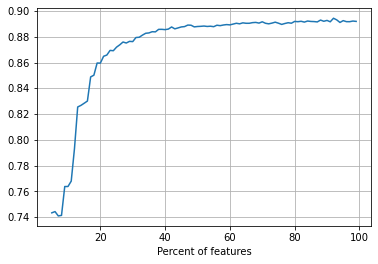

(16606, 115)
['col_0', 'col_4', 'col_7', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10', 'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education', 'gender', 'engnat', 'age', 'hand', 'religion', 'orientation', 'married', 'familysize', 'ASD', 'Q1_t', 'Q2_t', 'Q3_t', 'Q4_t', 'Q5_t', 'Q6_t', 'Q7_t', 'Q8_t', 'Q9_t', 'Q10_t', 'Q11_t', 'Q12_t', 'Q13_t', 'Q14_t', 'Q15_t', 'Q16_t', 'Q17_t', 'Q18_t', 'Q19_t', 'Q20_t', 'Q21_t', 'Q22_t', 'Q23_t', 'Q24_t', 'Q25_t', 'Q26_t', 'introelapse_t', 'testelapse_t', 'TIPI1_t', 'TIPI2_t', 'TIPI3_t', 'TIPI4_t', 'TIPI5_t', 'TIPI6_t', 'TIPI7_t', 'TIPI8_t', 'TIPI9_t', 'TIPI10_t', 'education_t', 'urban_t', 'gender_t', 'engnat_t', 'hand_t', 'religio

In [32]:
from tqdm.notebook import tqdm
from sklearn.feature_selection import SelectPercentile

model = ExtraTreesClassifier(random_state=2020)

cv_scores = []
for p in tqdm(range(5,100,1)):
    X_new = SelectPercentile(percentile=p).fit_transform(X_bsmote, y_bsmote)    
    cv_score = cross_val_score(model, X_new, y_bsmote, scoring='roc_auc', cv=5).mean()
    cv_scores.append((p,cv_score))

best_score = cv_scores[np.argmax([score for _, score in cv_scores])]
print(best_score)

plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores])
plt.xlabel('Percent of features')
plt.grid()
plt.show()

# 전체 값의 p%를 설명할 수 있도록
fs = SelectPercentile(percentile=best_score[0]).fit(X_bsmote, y_bsmote) 
X_train_et = fs.transform(X_bsmote)
X_test_et = fs.transform(test)

feature_name_et = X_bsmote.columns[fs.get_support()].tolist()

print(X_train_et.shape)
print(feature_name_et)

In [37]:
# 125개의 열 중에 115개가 선택됨
X_train_et.shape, X_test_et.shape

((16606, 115), (35452, 115))

### 깡통모델 결과 보기

In [35]:
import time
from sklearn.model_selection import cross_val_score

start_time = time.time()

print('et모델 : ', cross_val_score(ExtraTreesClassifier(random_state=2020) , X_train_et , y_bsmote ,cv=4,scoring='roc_auc'))
print(time.time() - start_time, '초 걸렸습니다.')
start_time1 = time.time()

print('rf모델 : ', cross_val_score(RandomForestClassifier(random_state=2020) , X_train_et , y_bsmote ,cv=4,scoring='roc_auc'))
print(time.time() - start_time1, '초 걸렸습니다.')
start_time2 = time.time()

print('lgbm모델 : ', cross_val_score(LGBMClassifier(random_state=2020) , X_train_et , y_bsmote ,cv=4,scoring='roc_auc'))
print(time.time() - start_time2, '초 걸렸습니다.')
start_time3 = time.time()

print('ada모델 : ', cross_val_score(AdaBoostClassifier(random_state=2020) , X_train_et , y_bsmote ,cv=4,scoring='roc_auc'))
print(time.time() - start_time3, '초 걸렸습니다.')
start_time4 = time.time()

print('MLP모델 : ', cross_val_score(MLPClassifier(random_state=2020) , X_train_et , y_bsmote ,cv=4,scoring='roc_auc'))
print(time.time() - start_time4, '초 걸렸습니다.')

et모델 :  [0.87634253 0.87824912 0.88595457 0.91082283]
8.41700005531311 초 걸렸습니다.
rf모델 :  [0.86575323 0.86337005 0.87423428 0.91508914]
9.823001623153687 초 걸렸습니다.
lgbm모델 :  [0.82294579 0.82224784 0.82920398 0.83475938]
1.6189994812011719 초 걸렸습니다.
ada모델 :  [0.79287137 0.78613413 0.79588644 0.77275576]
8.02983021736145 초 걸렸습니다.
MLP모델 :  [0.75959052 0.56243016 0.76007208 0.56007324]
5.031999111175537 초 걸렸습니다.


깡통 모델의 성능을 확인한 후, 성능이 좋은 et, rf, lgbm 모델을 사용하여 튜닝을 진행하였습니다.

### Model Tuning

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_train_et, y_bsmote, test_size=0.3, random_state=2020)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11624, 115), (4982, 115), (11624,), (4982,))

In [42]:
X_train_et.shape, y_bsmote.shape

((16606, 115), (16606,))

In [43]:
# 튜닝한 모델 담기
clfs_tuned = []

#### ▶ ExtraTree

In [44]:
import optuna
import sklearn.model_selection as model_selection

In [45]:
def objective(trial):
    et_n_estimators = trial.suggest_int("n_estimators", 30, 1500)
    et_min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    et_max_depth = trial.suggest_int("max_depth", 20, 1000)
    
    classifier_obj = ExtraTreesClassifier(n_estimators=et_n_estimators,
                                          min_samples_split=et_min_samples_split,
                                          max_depth= et_max_depth)

    score = model_selection.cross_val_score(classifier_obj, X_train_et, y_bsmote, scoring='roc_auc', cv=4, n_jobs=-1)
    roc_auc = score.mean()
    return roc_auc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)
print(study.best_trial)

[I 2022-08-20 22:17:21,124] A new study created in memory with name: no-name-d5782efe-c7c4-4a3d-9767-f4bcf2ee8c60
[I 2022-08-20 22:17:28,466] Trial 0 finished with value: 0.8854944719711035 and parameters: {'n_estimators': 85, 'min_samples_split': 3, 'max_depth': 424}. Best is trial 0 with value: 0.8854944719711035.
[I 2022-08-20 22:18:05,975] Trial 1 finished with value: 0.8895271529752274 and parameters: {'n_estimators': 1294, 'min_samples_split': 4, 'max_depth': 217}. Best is trial 1 with value: 0.8895271529752274.
[I 2022-08-20 22:18:15,366] Trial 2 finished with value: 0.8882375473331283 and parameters: {'n_estimators': 223, 'min_samples_split': 3, 'max_depth': 677}. Best is trial 1 with value: 0.8895271529752274.
[I 2022-08-20 22:18:41,962] Trial 3 finished with value: 0.8831683634618666 and parameters: {'n_estimators': 1149, 'min_samples_split': 8, 'max_depth': 846}. Best is trial 1 with value: 0.8895271529752274.
[I 2022-08-20 22:19:16,278] Trial 4 finished with value: 0.889593

[I 2022-08-20 22:28:52,618] Trial 37 finished with value: 0.8894563688894149 and parameters: {'n_estimators': 944, 'min_samples_split': 4, 'max_depth': 699}. Best is trial 22 with value: 0.8908727563561518.
[I 2022-08-20 22:29:06,180] Trial 38 finished with value: 0.8905592016511813 and parameters: {'n_estimators': 558, 'min_samples_split': 2, 'max_depth': 50}. Best is trial 22 with value: 0.8908727563561518.
[I 2022-08-20 22:29:22,560] Trial 39 finished with value: 0.8906934028366241 and parameters: {'n_estimators': 700, 'min_samples_split': 3, 'max_depth': 456}. Best is trial 22 with value: 0.8908727563561518.
[I 2022-08-20 22:29:47,070] Trial 40 finished with value: 0.8903818884635628 and parameters: {'n_estimators': 1070, 'min_samples_split': 3, 'max_depth': 651}. Best is trial 22 with value: 0.8908727563561518.
[I 2022-08-20 22:30:04,230] Trial 41 finished with value: 0.8904826077702281 and parameters: {'n_estimators': 733, 'min_samples_split': 3, 'max_depth': 451}. Best is trial 

FrozenTrial(number=47, values=[0.8911784264369897], datetime_start=datetime.datetime(2022, 8, 20, 22, 31, 27, 32511), datetime_complete=datetime.datetime(2022, 8, 20, 22, 31, 56, 86637), params={'n_estimators': 1235, 'min_samples_split': 2, 'max_depth': 192}, distributions={'n_estimators': IntUniformDistribution(high=1500, low=30, step=1), 'min_samples_split': IntUniformDistribution(high=10, low=2, step=1), 'max_depth': IntUniformDistribution(high=1000, low=20, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=47, state=TrialState.COMPLETE, value=None)


In [46]:
max_et = study.best_params
et_tune = ExtraTreesClassifier(**max_et, random_state = 2020)
et_tune.fit(X_train_et, y_bsmote)

ExtraTreesClassifier(max_depth=192, n_estimators=1235, random_state=2020)

In [47]:
cv_et = cross_val_score(et_tune, X_train_et, y_bsmote, cv=4, scoring = 'roc_auc')
print(cv_et)

[0.8809814  0.87878105 0.89096571 0.91388978]


In [48]:
clfs_tuned.append((type(et_tune).__name__, 
                   et_tune, 
                   np.mean(cv_et)))

In [49]:
# mean score
clfs_tuned[0]

('ExtraTreesClassifier',
 ExtraTreesClassifier(max_depth=192, n_estimators=1235, random_state=2020),
 0.8911544869153293)

#### ▶ RandomForest

In [50]:
def objective(trial): 
    rf_n_estimators = trial.suggest_int("n_estimators", 80, 120) # n_estimator 늘려서 다시해보기
    rf_max_depth = trial.suggest_int("max_depth", 2, 100, log=True)
    rf_max_leaf_nodes = trial.suggest_int("max_leaf_nodes", 2, 100)
    rf_criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    
    classifier_obj = RandomForestClassifier(n_estimators=rf_n_estimators, 
                                            max_depth=rf_max_depth,
                                            max_leaf_nodes=rf_max_leaf_nodes,
                                            criterion=rf_criterion,
                                            n_jobs=-1, 
                                            random_state=2020)


    score = model_selection.cross_val_score(classifier_obj, X_train_et, y_bsmote, scoring='roc_auc', cv=4, n_jobs=-1)
    roc_auc = score.mean()
    return roc_auc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)
print(study.best_trial)

[I 2022-08-20 22:35:11,165] A new study created in memory with name: no-name-503e1a08-28ac-4d28-a71d-d27568c1a150
[I 2022-08-20 22:35:11,932] Trial 0 finished with value: 0.756729730227111 and parameters: {'n_estimators': 112, 'max_depth': 5, 'max_leaf_nodes': 2, 'criterion': 'gini'}. Best is trial 0 with value: 0.756729730227111.
[I 2022-08-20 22:35:12,530] Trial 1 finished with value: 0.7748621144897901 and parameters: {'n_estimators': 94, 'max_depth': 3, 'max_leaf_nodes': 21, 'criterion': 'entropy'}. Best is trial 1 with value: 0.7748621144897901.
[I 2022-08-20 22:35:13,296] Trial 2 finished with value: 0.7894966488460441 and parameters: {'n_estimators': 97, 'max_depth': 47, 'max_leaf_nodes': 30, 'criterion': 'gini'}. Best is trial 2 with value: 0.7894966488460441.
[I 2022-08-20 22:35:14,636] Trial 3 finished with value: 0.8002045283945767 and parameters: {'n_estimators': 115, 'max_depth': 79, 'max_leaf_nodes': 78, 'criterion': 'entropy'}. Best is trial 3 with value: 0.8002045283945

[I 2022-08-20 22:35:48,749] Trial 34 finished with value: 0.8034992656146991 and parameters: {'n_estimators': 103, 'max_depth': 11, 'max_leaf_nodes': 100, 'criterion': 'entropy'}. Best is trial 34 with value: 0.8034992656146991.
[I 2022-08-20 22:35:49,769] Trial 35 finished with value: 0.8026064169303764 and parameters: {'n_estimators': 99, 'max_depth': 11, 'max_leaf_nodes': 94, 'criterion': 'entropy'}. Best is trial 34 with value: 0.8034992656146991.
[I 2022-08-20 22:35:50,779] Trial 36 finished with value: 0.7941356509938312 and parameters: {'n_estimators': 103, 'max_depth': 6, 'max_leaf_nodes': 71, 'criterion': 'gini'}. Best is trial 34 with value: 0.8034992656146991.
[I 2022-08-20 22:35:51,472] Trial 37 finished with value: 0.7737050848822804 and parameters: {'n_estimators': 104, 'max_depth': 26, 'max_leaf_nodes': 6, 'criterion': 'entropy'}. Best is trial 34 with value: 0.8034992656146991.
[I 2022-08-20 22:35:52,545] Trial 38 finished with value: 0.8022782870402613 and parameters: 

FrozenTrial(number=42, values=[0.8036730408385522], datetime_start=datetime.datetime(2022, 8, 20, 22, 35, 55, 504174), datetime_complete=datetime.datetime(2022, 8, 20, 22, 35, 56, 679172), params={'n_estimators': 118, 'max_depth': 10, 'max_leaf_nodes': 100, 'criterion': 'entropy'}, distributions={'n_estimators': IntUniformDistribution(high=120, low=80, step=1), 'max_depth': IntLogUniformDistribution(high=100, low=2, step=1), 'max_leaf_nodes': IntUniformDistribution(high=100, low=2, step=1), 'criterion': CategoricalDistribution(choices=('gini', 'entropy'))}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=42, state=TrialState.COMPLETE, value=None)


In [51]:
max_rf = study.best_params
rf_tune = RandomForestClassifier(**max_rf, n_jobs=-1)
rf_tune.fit(X_train_et, y_bsmote)

RandomForestClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=100,
                       n_estimators=118, n_jobs=-1)

In [52]:
rf_cv = cross_val_score(rf_tune, X_train_et, y_bsmote, cv=4, scoring = 'roc_auc')
print(rf_cv)

[0.79815308 0.80121473 0.80809852 0.80559463]


In [53]:
clfs_tuned.append((type(rf_tune).__name__, 
                   rf_tune, 
                   np.mean(rf_cv)))

In [54]:
# mean score
clfs_tuned[1]

('RandomForestClassifier',
 RandomForestClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=100,
                        n_estimators=118, n_jobs=-1),
 0.8032652408726086)

#### ▶ LGBM
[parameter]https://nurilee.com/2020/04/03/lightgbm-definition-parameter-tuning/

In [55]:
def objective(trial):
    lgbm_learning_rate = trial.suggest_float("learning_rate", 0.001, 0.1)
    lgbm_n_estimators = trial.suggest_int("n_estimators", 10, 1500)
    lgbm_max_depth = trial.suggest_int("max_depth", 6, 20)
    lgbm_subsample = trial.suggest_float("subsample", 0.8, 1)
    lgbm_colsample_bytree = trial.suggest_float("colsample_bytree", 0.7, 0.9)
    lgbm_min_child_samples = trial.suggest_int("min_child_samples", 5, 30)
    lgbm_num_leaves = trial.suggest_int("num_leaves", 5, 30)

    
    classifier_obj = LGBMClassifier(learning_rate=lgbm_learning_rate,
                                    n_estimators=lgbm_n_estimators,
                                    max_depth = lgbm_max_depth, # 과적합된 것 같다 _ max_depth 값을 줄이기
                                    subsample = lgbm_subsample,
                                    colsample_bytree = lgbm_colsample_bytree,
                                    min_child_samples = lgbm_min_child_samples, # 보통 큰 값으로 설정하면 트리가 깊어지는 것을 방지
                                    num_leaves = lgbm_num_leaves,
                                    application ='binary',
                                    # num_leaves의 개수를 높이면 정확도가 높아지지만, 
                                    # 반대로 트리의 깊이가 깊어지고 모델이 복잡도가 커져 과적합 영향도가 커짐
                                    random_state = 2020
                                    )

    score = model_selection.cross_val_score(classifier_obj, X_train_et, y_bsmote, scoring='roc_auc', cv=4, n_jobs=-1)
    roc_auc = score.mean()
    return roc_auc


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)
print(study.best_trial)

[I 2022-08-20 22:36:06,718] A new study created in memory with name: no-name-188b8675-7493-470b-ad1c-a4a20c5e32f9
[I 2022-08-20 22:36:19,208] Trial 0 finished with value: 0.8639238014181533 and parameters: {'learning_rate': 0.056436016125232066, 'n_estimators': 1406, 'max_depth': 20, 'subsample': 0.9261291412339175, 'colsample_bytree': 0.8694890855546608, 'min_child_samples': 20, 'num_leaves': 26}. Best is trial 0 with value: 0.8639238014181533.
[I 2022-08-20 22:36:26,663] Trial 1 finished with value: 0.8458591688806303 and parameters: {'learning_rate': 0.05899051721843935, 'n_estimators': 1083, 'max_depth': 7, 'subsample': 0.811298042192648, 'colsample_bytree': 0.8765591244012088, 'min_child_samples': 29, 'num_leaves': 15}. Best is trial 0 with value: 0.8639238014181533.
[I 2022-08-20 22:36:33,398] Trial 2 finished with value: 0.8257485531185519 and parameters: {'learning_rate': 0.03270933527324621, 'n_estimators': 1307, 'max_depth': 15, 'subsample': 0.8909201956826304, 'colsample_byt

[I 2022-08-20 22:39:07,059] Trial 24 finished with value: 0.8607237072796963 and parameters: {'learning_rate': 0.07334275951310193, 'n_estimators': 808, 'max_depth': 14, 'subsample': 0.8828486297083751, 'colsample_bytree': 0.8854086382297063, 'min_child_samples': 14, 'num_leaves': 28}. Best is trial 21 with value: 0.8682781437879108.
[I 2022-08-20 22:39:11,858] Trial 25 finished with value: 0.8575219102601278 and parameters: {'learning_rate': 0.09986061295822374, 'n_estimators': 560, 'max_depth': 11, 'subsample': 0.8660752969513245, 'colsample_bytree': 0.8968515221781997, 'min_child_samples': 7, 'num_leaves': 25}. Best is trial 21 with value: 0.8682781437879108.
[I 2022-08-20 22:39:20,438] Trial 26 finished with value: 0.8657238815822168 and parameters: {'learning_rate': 0.08764868320031236, 'n_estimators': 957, 'max_depth': 16, 'subsample': 0.9137263218709049, 'colsample_bytree': 0.8757239759509452, 'min_child_samples': 17, 'num_leaves': 30}. Best is trial 21 with value: 0.86827814378

[I 2022-08-20 22:42:38,511] Trial 48 finished with value: 0.8588731283347834 and parameters: {'learning_rate': 0.035470683203228076, 'n_estimators': 1173, 'max_depth': 17, 'subsample': 0.9392443827966619, 'colsample_bytree': 0.7259900332761012, 'min_child_samples': 22, 'num_leaves': 29}. Best is trial 33 with value: 0.8698867544084588.
[I 2022-08-20 22:42:47,422] Trial 49 finished with value: 0.8668583682967137 and parameters: {'learning_rate': 0.08136509792999086, 'n_estimators': 1300, 'max_depth': 13, 'subsample': 0.924240462461315, 'colsample_bytree': 0.7313574656265307, 'min_child_samples': 24, 'num_leaves': 27}. Best is trial 33 with value: 0.8698867544084588.


FrozenTrial(number=33, values=[0.8698867544084588], datetime_start=datetime.datetime(2022, 8, 20, 22, 40, 18, 71172), datetime_complete=datetime.datetime(2022, 8, 20, 22, 40, 29, 395173), params={'learning_rate': 0.09436777326485182, 'n_estimators': 1477, 'max_depth': 14, 'subsample': 0.8352937679389818, 'colsample_bytree': 0.7661787982334419, 'min_child_samples': 25, 'num_leaves': 28}, distributions={'learning_rate': UniformDistribution(high=0.1, low=0.001), 'n_estimators': IntUniformDistribution(high=1500, low=10, step=1), 'max_depth': IntUniformDistribution(high=20, low=6, step=1), 'subsample': UniformDistribution(high=1.0, low=0.8), 'colsample_bytree': UniformDistribution(high=0.9, low=0.7), 'min_child_samples': IntUniformDistribution(high=30, low=5, step=1), 'num_leaves': IntUniformDistribution(high=30, low=5, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=33, state=TrialState.COMPLETE, value=None)


In [56]:
max_lgbm = study.best_params
lgbm_tune = LGBMClassifier(**max_lgbm, random_state=2020)
lgbm_tune.fit(X_train_et, y_bsmote)

LGBMClassifier(colsample_bytree=0.7661787982334419,
               learning_rate=0.09436777326485182, max_depth=14,
               min_child_samples=25, n_estimators=1477, num_leaves=28,
               random_state=2020, subsample=0.8352937679389818)

In [57]:
lgbm_cv = cross_val_score(lgbm_tune, X_train_et, y_bsmote, cv=4, scoring = 'roc_auc')
print(lgbm_cv)

[0.8538228  0.85538204 0.86791977 0.90242101]


In [58]:
clfs_tuned.append((type(lgbm_tune).__name__, 
                   lgbm_tune, 
                   np.mean(lgbm_cv)))

In [59]:
# mean score
clfs_tuned[2]

('LGBMClassifier',
 LGBMClassifier(colsample_bytree=0.7661787982334419,
                learning_rate=0.09436777326485182, max_depth=14,
                min_child_samples=25, n_estimators=1477, num_leaves=28,
                random_state=2020, subsample=0.8352937679389818),
 0.8698864063625278)

### Model Ensemble

In [62]:
# 상관관계 확인
(ensemble_results.corr().sum()-1)/(ensemble_results.corr().shape[0]-1)

ExtraTreesClassifier \n(0.8912)      0.800096
RandomForestClassifier \n(0.8033)    0.734795
LGBMClassifier \n(0.8699)            0.830599
dtype: float64

Voting

In [74]:
clfs_tuned

[('ExtraTreesClassifier',
  ExtraTreesClassifier(max_depth=192, n_estimators=1235, random_state=2020),
  0.8911544869153293),
 ('RandomForestClassifier',
  RandomForestClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=100,
                         n_estimators=118, n_jobs=-1),
  0.8032652408726086),
 ('LGBMClassifier',
  LGBMClassifier(colsample_bytree=0.7661787982334419,
                 learning_rate=0.09436777326485182, max_depth=14,
                 min_child_samples=25, n_estimators=1477, num_leaves=28,
                 random_state=2020, subsample=0.8352937679389818),
  0.8698864063625278)]

In [76]:
# RandomForest의 성능이 많이 떨어진다고 판단하여 ExtraTree와 LGBM만으로 Voting을 진행

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score

models1 =  (clfs_tuned[0], # ExtraTreesClassifier
            #clfs_tuned[1], # RandomForestClassifier
            clfs_tuned[2], # LGBMClassifier
            )

estimators1 = [(name, clf) for name, clf, _ in models1]

voting_clf = VotingClassifier(estimators = estimators1, voting='soft', n_jobs=-1)
voting_clf.fit(X_train_et, y_bsmote)

cv_score = cross_val_score(voting_clf, X_train_et, y_bsmote, scoring='roc_auc', cv=5)

print(cv_score, cv_score.mean())

[0.88460416 0.88302264 0.88334325 0.89090583 0.93029239] 0.8944336531546865


**제출 csv 만들기**

In [78]:
voting_clf_pred = voting_clf.predict_proba(X_test_et)[:,1]

In [79]:
submission = pd.read_csv('sample_submission.csv')

In [80]:
submission["nerdiness"] = voting_clf_pred

In [81]:
submission

,index,nerdiness
0,0,0.017897
1,1,0.863181
2,2,0.894188
3,3,0.746717
4,4,0.965407
...,...,...
35447,35447,0.984639
35448,35448,0.625221
35449,35449,0.967260
35450,35450,0.007041


In [82]:
submission.to_csv("voting_ltb_0820.csv", index = False)

단독 제출 public 점수 : 0.9053248087

## Version 3 / Feature making

In [1]:
# Data Wrangling
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline
plt.rc('font',family='Malgun Gothic')

# Data Split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
seed = 42
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Hyperparameter Optimization
from bayes_opt import BayesianOptimization

# Modeling
from sklearn.ensemble import ExtraTreesClassifier

# Evaluation
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Utility
import shap
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
from tqdm import tqdm, tqdm_notebook
import warnings
import optuna

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [3]:
y_train=train.iloc[:,-1]
train=train.iloc[:,1:-1]
test=test.iloc[:,1:]

### Data Preprocessing

In [5]:
train.fillna("NAN", inplace=True)
test.fillna("NAN", inplace=True)

In [8]:
# 모든 문항에 대한 결측값 합산
col=train.columns.to_list()
train["normal_Nsum"]=train[col].applymap(lambda x: 1 if x=="NAN" else 0 ).sum(axis=1)
test["normal_Nsum"]=test[col].applymap(lambda x: 1 if x=="NAN" else 0 ).sum(axis=1)

In [9]:
# 매우 그렇다라고 응답하였을 경우 안좋아 보이는 질문에 대해 매우 그렇다고 한 응답 수 합산 q버전

normal_q=['Q1', 'Q2', 'Q5', 'Q8', 'Q12', 'Q13', 'Q15', 'Q19', 'Q20']
train["normal_qsum"]=train[normal_q].applymap(lambda x: 1 if x==5 else 0 ).sum(axis=1)
test["normal_qsum"]=test[normal_q].applymap(lambda x: 1 if x==5 else 0 ).sum(axis=1)

In [10]:
# 아래 문항은 타 문항과 다르게 1의 값이 5보다 많은 경우로 답변의 성실도를 파악

normal_ss=['Q11', 'Q15', 'Q19', 'Q21', 'Q22']
train["normal_ss"]=train[normal_ss].applymap(lambda x: 1 if x==1 else 0 ).sum(axis=1)
test["normal_ss"]=test[normal_ss].applymap(lambda x: 1 if x==1 else 0 ).sum(axis=1)

In [11]:
# Q 문항에 대해 각 응답 별 합 및 평균 단, 1의 값이 5보다 많은 경우의 답변을 제외.

Q_LST=[x for x in train.columns.to_list() if x[0]=="Q" and x not in normal_ss]
train["normal_q1"]=train[Q_LST].applymap(lambda x: 1 if x==1 else 0 ).sum(axis=1)
test["normal_q1"]=test[Q_LST].applymap(lambda x: 1 if x==1 else 0 ).sum(axis=1)

train["normal_q2"]=train[Q_LST].applymap(lambda x: 1 if x==2 else 0 ).sum(axis=1)
test["normal_q2"]=test[Q_LST].applymap(lambda x: 1 if x==2 else 0 ).sum(axis=1)

train["normal_q3"]=train[Q_LST].applymap(lambda x: 1 if x==3 else 0 ).sum(axis=1)
test["normal_q3"]=test[Q_LST].applymap(lambda x: 1 if x==3 else 0 ).sum(axis=1)

train["normal_q4"]=train[Q_LST].applymap(lambda x: 1 if x==4 else 0 ).sum(axis=1)
test["normal_q4"]=test[Q_LST].applymap(lambda x: 1 if x==4 else 0 ).sum(axis=1)

train["normal_q5"]=train[Q_LST].applymap(lambda x: 1 if x==5 else 0 ).sum(axis=1)
test["normal_q5"]=test[Q_LST].applymap(lambda x: 1 if x==5 else 0 ).sum(axis=1)

train["normal_me"]=train[Q_LST].applymap(lambda x: 2.5 if x=="NAN" else x ).mean(axis=1)
test["normal_me"]=test[Q_LST].applymap(lambda x: 2.5 if x=="NAN" else x ).mean(axis=1)

In [12]:
# 매우 그렇다라고 응답하였을 경우 안좋아 보이는 질문에 대해 매우 그렇다고 한 응답 수 합산 t버전

normal_t=['TIPI2', 'TIPI4', 'TIPI5', 'TIPI8']
train["normal_tsum"]=train[normal_t].applymap(lambda x: 1 if x==5 else 0 ).sum(axis=1)
test["normal_tsum"]=test[normal_t].applymap(lambda x: 1 if x==5 else 0 ).sum(axis=1)

In [13]:
# 매우 그렇다라고 응답하였을 경우 좋아 보이는 질문에 대해 매우 그렇다고 한 응답 수 합산 t버전

normal_t_1=['TIPI1', 'TIPI3', 'TIPI6', 'TIPI7', 'TIPI9', 'TIPI10']
train["normal_tsum_1"]=train[normal_t_1].applymap(lambda x: 1 if x==5 else 0 ).sum(axis=1)
test["normal_tsum_1"]=test[normal_t_1].applymap(lambda x: 1 if x==5 else 0 ).sum(axis=1)

In [14]:
# 1~5까지의 질문 중 극단적으로 답한 사람들과 애매한 사람들 그리고 질문에 대답을 하지 않은 사람들

QT_LST=[x for x in train.columns.to_list() if x[0]=="Q" or x[0]=="T"]
train["normal_15sum"]=train[QT_LST].applymap(lambda x: 1 if x==5 or x==1 else 0 ).sum(axis=1)
test["normal_15sum"]=test[QT_LST].applymap(lambda x: 1 if x==5 or x==1 else 0 ).sum(axis=1)

train["normal_24sum"]=train[QT_LST].applymap(lambda x: 1 if x==2 or x==4 else 0 ).sum(axis=1)
test["normal_24sum"]=test[QT_LST].applymap(lambda x: 1 if x==2 or x==4 else 0 ).sum(axis=1)

train["normal_33sum"]=train[QT_LST].applymap(lambda x: 1 if x==3  else 0 ).sum(axis=1)
test["normal_33sum"]=test[QT_LST].applymap(lambda x: 1 if x==3 else 0 ).sum(axis=1)

train["normal_nosum"]=train[QT_LST].applymap(lambda x: 1 if x=="NAN"  else 0 ).sum(axis=1)
test["normal_nosum"]=test[QT_LST].applymap(lambda x: 1 if x=="NAN" else 0 ).sum(axis=1)

In [15]:
# 단어 정의 질문에 대해 없는 단어에 안다고 한 문항의 합

normal_v=["VCL6","VCL9","VCL12"]
train["normal_v"]=train[normal_v].applymap(lambda x: 1 if x==1 else 0 ).sum(axis=1)
test["normal_v"]=test[normal_v].applymap(lambda x: 1 if x==1 else 0 ).sum(axis=1)

In [16]:
# 단어 정의 질문에 대해 안다고 한 평균

V_LST=[x for x in train.columns.to_list() if x[0]=="V"]
train["normal_word"]=train[V_LST].mean(axis=1)
test["normal_word"]=test[V_LST].mean(axis=1)

In [17]:
# 설문조사 걸린 시간에 대해 상위 하위 구분 너무 빨리 하거나, 너무 늦게 했을 경우 판단.

time_lst=["introelapse", "surveyelapse", "testelapse"]

train["time"]=train[time_lst].sum(axis=1)
test["time"]=test[time_lst].sum(axis=1)
time_lst.append("time")

for t in time_lst:
    eighty=train[t].quantile(0.8)
    twenty=train[t].quantile(0.2)
    
    train[t+" eighty"] = train[t].apply(lambda x: 1 if x >= eighty else 0)
    test[t+" eighty"] = test[t].apply(lambda x: 1 if x >= eighty else 0)
    
    train[t+" twenty"] = train[t].apply(lambda x: 1 if x <= twenty else 0)
    test[t+" twenty"] = test[t].apply(lambda x: 1 if x <= twenty else 0)

In [18]:
category_LST=[x for x in train.columns.to_list() if x[0]=="Q" or x[0]=="T" or x[0]=="V"]
C_LST=["country", "education", "urban", "gender", "engnat", "hand", "religion", "orientation", "voted", "married", "ASD",
      "introelapse eighty", "introelapse twenty", "surveyelapse eighty", "surveyelapse twenty",
      "testelapse eighty", "testelapse twenty"]
numeric_LST = list(set(train.columns.to_list())-set(category_LST)-set(C_LST))

In [21]:
# 수치형 변수 한계 값 설정

train.loc[train["familysize"]=="NAN","familysize"]=11
test.loc[test["familysize"]=="NAN","familysize"]=11

numeric_sc = ["familysize", "age", "introelapse", "surveyelapse", "testelapse", "time"]
for n in numeric_sc:
    mn=train[n].quantile(.003)
    mx=train[n].quantile(.997)
    print(n, mx)
    train[n]=train[n].clip(mn, mx, axis=0)
    test[n]=test[n].clip(mn, mx, axis=0)

familysize 11.0
age 69.0
introelapse 54407.30000000373
surveyelapse 7235.201000000041
testelapse 5467.512000000308
time 80885.3940000011


In [22]:
# 시간 변수 로그 변환
train[["introelapse", "surveyelapse", "testelapse", "time"]]=train[["introelapse", "surveyelapse", "testelapse", "time"]].applymap(lambda x: np.log1p(x))
test[["introelapse", "surveyelapse", "testelapse", "time"]]=test[["introelapse", "surveyelapse", "testelapse", "time"]].applymap(lambda x: np.log1p(x))

In [23]:
# 수치형 변수 민맥스 스케일링 진행 범주형 변수를 민 인코딩 진행할 예정이기에 맞춤.
# 값의 종류를 0~1로 설정하기 위함.

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(train[numeric_LST])

# 훈련 데이터 스케일링
train_scaled = minmax_scaler.transform(train[numeric_LST])

# 테스트 데이터의 스케일링
test_scaled = minmax_scaler.transform(test[numeric_LST])

In [24]:
train[numeric_LST]=pd.DataFrame(train_scaled, columns=numeric_LST)
test[numeric_LST]=pd.DataFrame(test_scaled, columns=numeric_LST)

In [25]:
# country binary encoding 진행 -> country값의 종류가 많아 binary encoding을 사용
# train에 없는 country일 경우 전부 결측값으로 변환
test["country"]=test["country"].apply(lambda x: x if x in list(train["country"].unique()) else "NAN")

import category_encoders as ce
encoder = ce.BinaryEncoder(cols=["country"])

train_country=encoder.fit_transform(train["country"])
test_country=encoder.transform(test["country"])

In [26]:
# 범주형 변수 mean encoding 진행  mean encoding 과적합 방지를 위해 k-fold 추가하여 다양한 mean encoding 값을 생성
category_LST = category_LST + C_LST
category_LST.remove("country")
category_LST.append("Target")

In [27]:
# train에는 k-fold를 이용한 다양한 값의 mean encoding주입하기
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_new = train[category_LST].copy()

for ca_c in category_LST:
    if ca_c=="Target": break;
    train_new[ca_c+'_mean'] = np.nan

    # 각 Fold iteration.
    for tr_idx, val_idx in skf.split(train.drop("Target", axis=1), train["Target"]):
        X_train, X_val = train.loc[tr_idx], train.loc[val_idx]
        # train set 에서 구한 mean encoded 값을 validation set 에 매핑해줌.
        train_new.loc[val_idx,ca_c+'_mean'] = X_val[ca_c].map(X_train.groupby(ca_c)["Target"].mean())

In [28]:
# 테스트에 트레인을 이용하여 mean encoding주입하기
for ca_c in category_LST:
    if ca_c=="Target": break;
    test[ca_c+"_mean"]=test[ca_c].map(train.groupby(ca_c)["Target"].mean())

In [29]:
mean_lst=list(set(train_new.columns.to_list())-set(category_LST))
category_LST.remove("Target")

In [30]:
# 데이터 프레임 정리

train=pd.concat([train_new[mean_lst], train_country, train[numeric_LST]],axis=1)
test=pd.concat([test[mean_lst], test_country, test[numeric_LST]],axis=1)

## Version 3 / Modeling

target데이터 값의 비율을 일치시키기 위한 Oversampling 사용 \( Borderline SMOTE \)

In [33]:
from imblearn.over_sampling import BorderlineSMOTE
bsmote = BorderlineSMOTE(random_state=2020, k_neighbors=5, m_neighbors=10)
X_bsmote, y_bsmote = bsmote.fit_resample(train,y_train)

X_bsmote.shape, y_bsmote.shape

In [35]:
y_train.value_counts(), y_bsmote.value_counts()

(1    8303
 0    6697
 Name: nerdiness, dtype: int64,
 1    8303
 0    8303
 Name: nerdiness, dtype: int64)

In [36]:
# 데이터 오버샘플링으로 인한 위치에 따른 데이터 라벨 불균형 존재 -> 데이터 셔플.

X_bsmote["y_train"]= y_bsmote
X_bsmote=X_bsmote.sample(frac=1, random_state=5252)
y_bsmote = X_bsmote["y_train"]
del X_bsmote["y_train"]

#### ExtraTree Optuna

In [37]:
def objective(trial):
    et_n_estimators = trial.suggest_int("n_estimators", 30, 1500)
    et_min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    et_max_depth = trial.suggest_int("max_depth", 20, 1000)
    
    classifier_obj = ExtraTreesClassifier(n_estimators=et_n_estimators,
                                          min_samples_split=et_min_samples_split,
                                          max_depth= et_max_depth,
                                          random_state = 2020)

    score = model_selection.cross_val_score(classifier_obj, X_bsmote, y_bsmote, scoring='roc_auc', cv=skf, n_jobs=-1)
    log_loss = score.mean()
    return log_loss


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)
print(study.best_trial)

[I 2022-08-22 00:19:28,167] A new study created in memory with name: no-name-c7b9742d-5637-4a66-8035-85c7e5c6d0d1
[I 2022-08-22 00:20:29,906] Trial 0 finished with value: 0.8948420122057232 and parameters: {'n_estimators': 1162, 'min_samples_split': 10, 'max_depth': 997}. Best is trial 0 with value: 0.8948420122057232.


FrozenTrial(number=0, values=[0.8948420122057232], datetime_start=datetime.datetime(2022, 8, 22, 0, 19, 28, 169302), datetime_complete=datetime.datetime(2022, 8, 22, 0, 20, 29, 905684), params={'n_estimators': 1162, 'min_samples_split': 10, 'max_depth': 997}, distributions={'n_estimators': IntUniformDistribution(high=1500, low=30, step=1), 'min_samples_split': IntUniformDistribution(high=10, low=2, step=1), 'max_depth': IntUniformDistribution(high=1000, low=20, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=0, state=TrialState.COMPLETE, value=None)


In [ ]:
max_et = study.best_params
et_tune = ExtraTreesClassifier(**max_et, random_state = 2020)
et_tune.fit(X_bsmote, y_bsmote)
pred = et_tune.predict_proba(test)[:,1]

submission = pd.read_csv('sample_submission.csv')
submission["nerdiness"] = pred

submission.to_csv('et_tune_gms_0821.csv',index=False)

단독 제출 public 점수 : 0.9024656994

## Final Ensemble

개인별로 만든 submission들을 마지막으로 앙상블하였습니다.


Version1 : 결측치 마지막 값 다음값으로, 인코딩 피처 기존 피처 대체, SMOTE, ExtraTree  
Version2 : 결측치 0, 인코딩 피처 기존 피처 유지, BorderlineSMOTE, ExtraTree & LGBM Voting  
Version3 : 칼럼 별 세부적인 분석으로 피처 추가, BorderlineSMOTE, ExtraTree  

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np 
import pandas as pd 
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
time = '0826'

In [3]:
# 아래 폴더에 submission 파일이 있다는 가정 하에 수행
folder = f'./submission{time}'

In [4]:
use_submission = os.listdir(folder)
use_submission

['et_tune_gms_0821.csv', 'et_tune_jmj_0822.csv', 'voting_ltb_0820.csv']

In [5]:
use_submission2 = []

for i in use_submission:
    use_submission2.append(os.path.abspath(f"./submission{time}")+('/')+i)

In [6]:
use_submission2

['C:\\Users\\hites\\Desktop\\쿠민의힘\\submission0826/et_tune_gms_0821.csv',
 'C:\\Users\\hites\\Desktop\\쿠민의힘\\submission0826/et_tune_jmj_0822.csv',
 'C:\\Users\\hites\\Desktop\\쿠민의힘\\submission0826/voting_ltb_0820.csv']

In [8]:
outs = [pd.read_csv(f).iloc[:,1:] for f in use_submission2]

In [9]:
pred_results = []
for i in outs:
    pred_results.append(i)
ensemble_results = pd.concat(pred_results, axis=1)

In [10]:
use_submission_col = []
for i in use_submission2:
    use_submission_col.append(i.split('/')[1])
ensemble_results.columns = use_submission_col

In [10]:
# 앙상블할 3개의 submission
ensemble_results

,et_tune_gms_0821.csv,et_tune_jmj_0822.csv,voting_ltb_0820.csv
0,0.194389,0.000000,0.017897
1,0.796259,0.781461,0.863181
2,0.798931,0.803789,0.894188
3,0.563794,0.566306,0.746717
4,0.892452,1.000000,0.965407
...,...,...,...
35447,0.914496,1.000000,0.984639
35448,0.712091,0.711096,0.625221
35449,0.925184,0.912043,0.967260
35450,0.150301,0.000000,0.007041


**submission 파일간의 상관관계 확인**

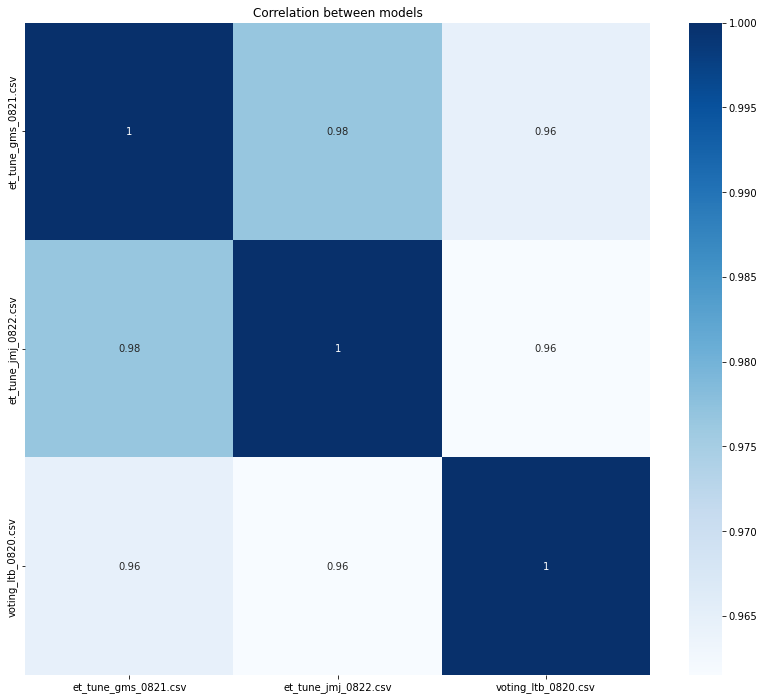

In [11]:
plt.figure(figsize = (14,12))
g = sns.heatmap(ensemble_results.corr(), annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()

In [21]:
# 아래 폴더가 있다는 가정 하에 수행
folder = f'./submission{time}'
nf = 0
for f in use_submission2:
    ext = f.split('.')[1]
    if ext == 'csv': 
        s = pd.read_csv(f)
    else: 
        continue
    if len(s.columns) !=2:
        continue
    if nf == 0: 
        slist = s
    else: 
        slist = pd.merge(slist, s, on="index")
    nf += 1
print(nf)

p = 0.1 # p의 값에 따른 멱평균 ( 1일 경우 산술평균 )
if nf >= 2:
    preds = []
    for i in range(1):
        pred = 0
        for j in range(nf):
            pred = pred + slist.iloc[:,j*1+i+1]**p 
        pred = pred / nf    
        pred = pred**(1/p)
        preds.append(pred)     
    preds = pd.DataFrame(preds).T
    fname = f"/p{p}mean_submission_{nf}_{time}.csv"
    preds.columns = ['nerdiness']
    pd.concat([pd.Series(slist.index, name="index"), preds] ,axis=1).to_csv(os.path.abspath(f"./submission{time}")+fname, index=False)
    print(f"'{fname}' is ready to submit.")

3
'/p0.1mean_submission_3_0826.csv' is ready to submit.


In [22]:
pd.read_csv(f'./submission{time}/p0.1mean_submission_3_0826.csv')

,index,nerdiness
0,0,0.001098
1,1,0.812946
2,2,0.831288
3,3,0.620610
4,4,0.951658
...,...,...
35447,35447,0.965723
35448,35448,0.681679
35449,35449,0.934564
35450,35450,0.000634


public 점수는 0.90684로 5위를 기록하였고 private는 0.90276로 7위를 기록하였습니다. 